In [114]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
%autoreload 2
from CommunicationJacobians.dysts_sim.flows import *
from CommunicationJacobians.jacobians.data_utils import compute_lyaps
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import torch

# Lotka Volterra

## Make Metadata

In [71]:
eq_vals = dict(
    eq_name='LotkaVolterra',
    citation="Alfred James Lotka. Elements of physical biology. Williams & Wilkins, 1925." + " | " + "Karniol-Tambour, O., Zoltowski, D. M., Diamanti, E. M., Pinto, L., Tank, D. W., Brody, C. D., & Pillow, J. W. (2022). Modeling communication and switching nonlinear dynamics in multi-region neural activity. In bioRxiv (p. 2022.09.13.507841). https://doi.org/10.1101/2022.09.13.507841",
    embedding_dimension=2,
    parameters={'alpha': 2/3, 'beta': 4/3, 'gamma': 1,'delta': 1},
    initial_conditions=[1.1, 1.1],
    positive_only=True,
    dt=0.1,
    sim_time=100,
)

No metadata available for LotkaVolterra
Overriding: metadata will be made!
Making metadata for LotkaVolterra!
Chosen period is 8.733624454148472 seconds
plotting stuff...


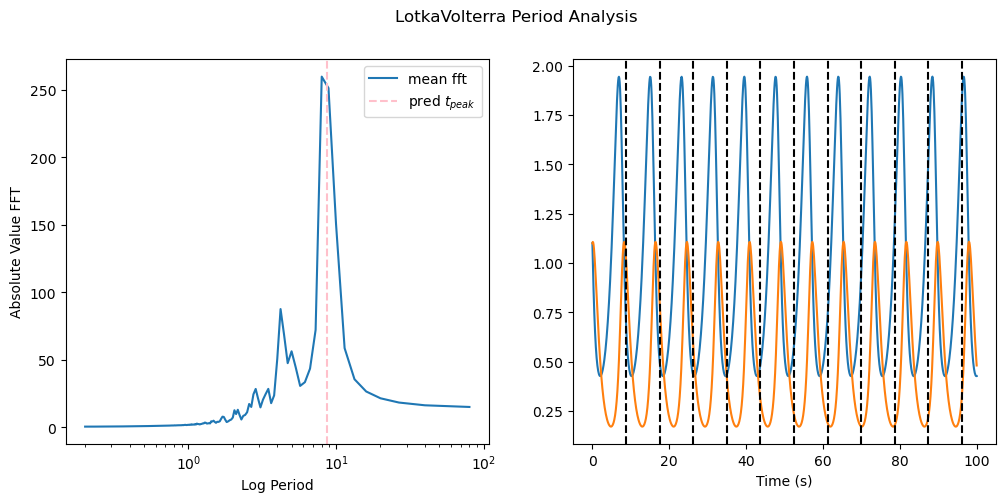

In [72]:
make_metadata(**eq_vals, override=True, testing=False)

## Test LotkaVolterra

In [3]:
eq = LotkaVolterra()

In [4]:
ret = eq.make_trajectory(n_periods=12, pts_per_period=100, num_ics=10, return_times=True, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

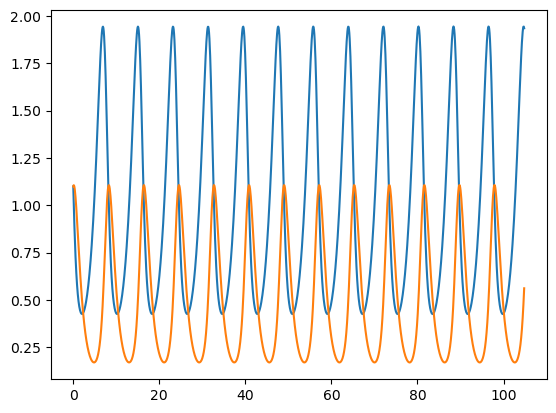

In [5]:
sol = ret['values']
plt.plot(ret['time'], sol[0, :, 0])
plt.plot(ret['time'], sol[0, :, 1])
plt.show()

# LorotkaVoltarneodo

## Make Metadata

In [5]:
arneodo = Arneodo()
lorenz = Lorenz()
lotka_volterra = LotkaVolterra()
min_period = np.min([arneodo.period, lorenz.period, lotka_volterra.period])

In [15]:
eq_vals = dict(
    eq_name='LorotkaVoltarneodo',
    citation=None,
    embedding_dimension=7,
    parameters=arneodo.parameters | lorenz.parameters | {key + '_lv': value for key, value in lotka_volterra.parameters.items()},
    initial_conditions=list(np.concatenate((arneodo.initial_conditions, lorenz.initial_conditions, lotka_volterra.initial_conditions))),
    dt=min_period/100,
    sim_time=50,
    num_ics=10,
    traj_offset_sd=0.01,
)

In [16]:
# receiver by sender
# arneodo, lorenz, lotka volterra
comm_val = 0.1
eq_kwargs = dict(
    comm_strengths=np.array([[1, comm_val, 0], [0, 1, comm_val], [0, 0, 1]]),
    random_state=42,
)

Overriding: metadata will be made!
Making metadata for LorotkaVoltarneodo!
Computing trajectory solutions...


  0%|          | 0/10 [00:00<?, ?it/s]

Trajectory solutions identified!!
0.015007999999999999
Finding period...


  0%|          | 0/80 [00:00<?, ?it/s]

Chosen period is 2.854331489741303 seconds
plotting stuff...


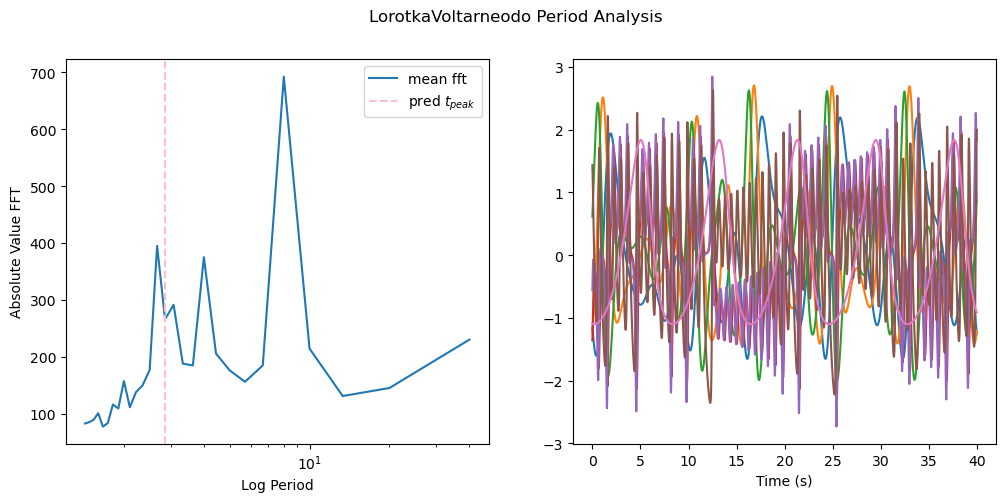

In [22]:
make_metadata(**eq_vals, **eq_kwargs, override=True, testing=False, verbose=True)

## Test

In [18]:
# arneodo, lorenz, lotka volterra
comm_val = 0.1
eq_kwargs = dict(
    comm_strengths=np.array([[1, comm_val, 0], [0, 1, comm_val], [0, 0, 1]]),
    random_state=42,
)
eq = LorotkaVoltarneodo(**eq_kwargs)
sol = eq.make_trajectory(n_periods=12, pts_per_period=100)

In [19]:
eq_kwargs = dict(
    comm_strengths=np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
    random_state=42,
)
eq = LorotkaVoltarneodo(**eq_kwargs)
sol2 = eq.make_trajectory(n_periods=12, pts_per_period=100, verbose=True)

eq_kwargs = dict(
    comm_strengths=np.array([[1, 0, 0], [0, 1, comm_val], [0, 0, 1]]),
    random_state=42,
)
eq = LorotkaVoltarneodo(**eq_kwargs)
sol3 = eq.make_trajectory(n_periods=12, pts_per_period=100, verbose=True)

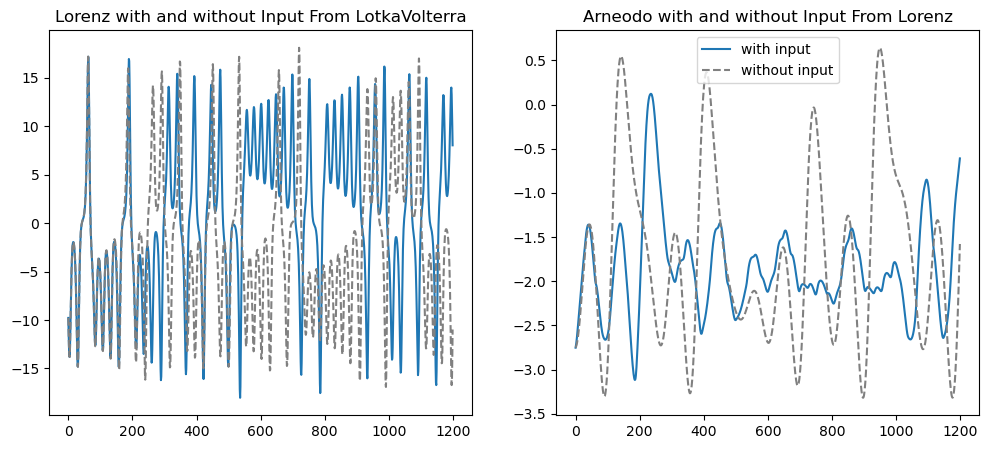

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Lorenz with and without Input From LotkaVolterra')
plt.plot(sol[0, :, 3], c='C0')
plt.plot(sol2[0, :, 3], c='gray', linestyle='--')
# plt.plot(sol[0, :, 1], c='C1')
# plt.plot(sol2[0, :, 1], c='C1', linestyle='--')

plt.subplot(1, 2, 2)
plt.title('Arneodo with and without Input From Lorenz')
plt.plot(sol[0, :, 0], c='C0', label='with input')
plt.plot(sol3[0, :, 0], c='gray', linestyle='--', label='without input')
# plt.plot(sol[0, :, 1], c='C1')
# plt.plot(sol2[0, :, 1], c='C1', linestyle='--')
plt.legend()
plt.show()

# Van der Pol Oscillator

In [3]:
eq_vals = dict(
    eq_name='VanDerPol',
    citation="van der Pol, B. (1926). LXXXVIII. On “relaxation-oscillations.” The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 2(11), 978–992.",
    embedding_dimension=2,
    parameters={'mu': 2},
    initial_conditions=[0.8, 1],
    positive_only=False,
    dt=0.1,
    sim_time=100,
)

No metadata available for VanDerPol
Overriding: metadata will be made!
Making metadata for VanDerPol!
Computing trajectory solutions...
Trajectory solutions identified!!
0.1
Finding period...


  0%|          | 0/50 [00:00<?, ?it/s]

Chosen period is 8.0 seconds
plotting stuff...


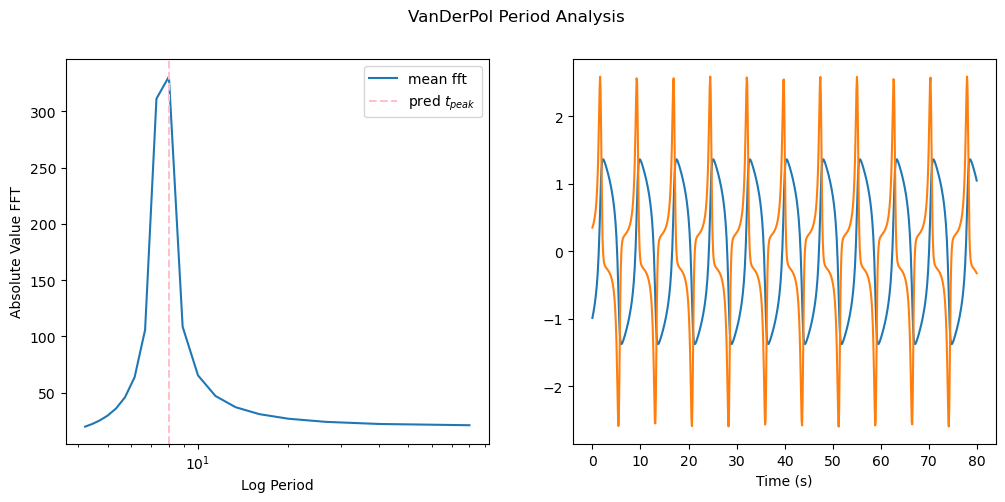

In [4]:
make_metadata(**eq_vals, override=True, testing=False)

## Test VanDerPol

In [5]:
eq = VanDerPol()

In [6]:
ret = eq.make_trajectory(n_periods=12, pts_per_period=100, num_ics=10, return_times=True, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

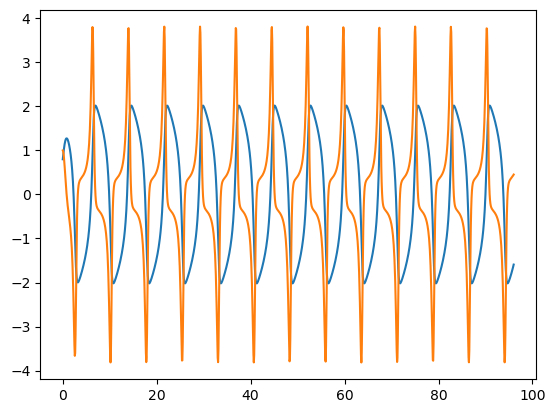

In [13]:
sol = ret['values']
plt.plot(ret['time'], sol[0, :, 0])
plt.plot(ret['time'], sol[0, :, 1])
plt.show()

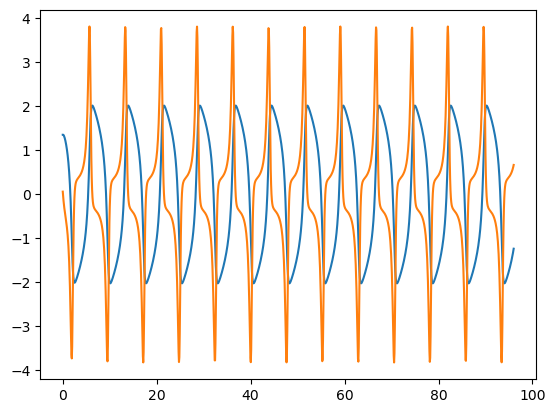

In [14]:
sol = ret['values']
plt.plot(ret['time'], sol[5, :, 0])
plt.plot(ret['time'], sol[5, :, 1])
plt.show()

# RNN in Oscillating Regime

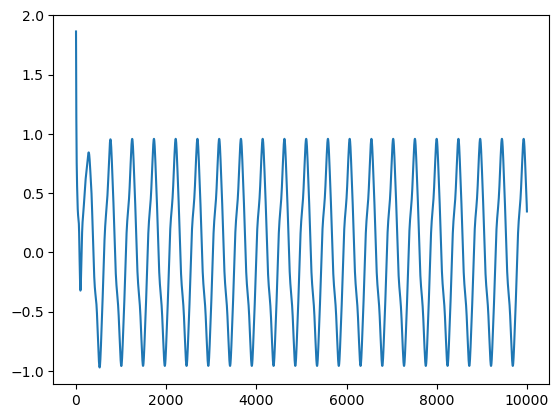

In [15]:
n = 128
g = 1.4
tau = 0.01 # s
y0 = np.random.randn(n)
W = np.random.randn(n, n)*g/np.sqrt(n)

t_span = [0, 10]
dt = 0.001
t_eval = np.arange(t_span[0], t_span[1], dt)
sol = solve_ivp(lambda t, x: RNNOscillator._rhs(x, t, W=W, tau=tau), y0=y0, t_span=t_span, t_eval=t_eval)
plt.plot(sol.y.T[:, 0])
plt.show()

In [16]:
eq_vals = dict(
    eq_name='RNNOscillator',
    # citation="Alfred James Lotka. Elements of physical biology. Williams & Wilkins, 1925." + " | " + "Karniol-Tambour, O., Zoltowski, D. M., Diamanti, E. M., Pinto, L., Tank, D. W., Brody, C. D., & Pillow, J. W. (2022). Modeling communication and switching nonlinear dynamics in multi-region neural activity. In bioRxiv (p. 2022.09.13.507841). https://doi.org/10.1101/2022.09.13.507841",
    embedding_dimension=n,
    parameters={'W': W.tolist(), 'tau': tau},
    initial_conditions=y0.tolist(),
    positive_only=False,
    vectorize=True,
    dt=0.001,
    sim_time=5,
)

In [ ]:
make_metadata(**eq_vals, override=True, testing=False)

No metadata available for RNNOscillator
Overriding: metadata will be made!
Making metadata for RNNOscillator!
Computing trajectory solutions...


### Test RNNOscillator

In [40]:
eq = RNNOscillator()

In [41]:
ret = eq.make_trajectory(n_periods=12, pts_per_period=100, num_ics=10, return_times=True, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

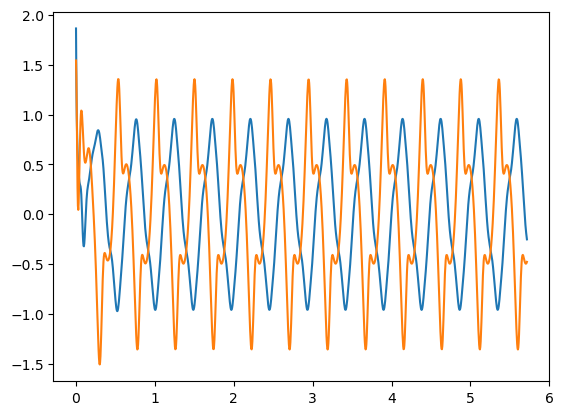

In [43]:
sol = ret['values']
plt.plot(ret['time'], sol[0, :, 0])
plt.plot(ret['time'], sol[0, :, 98])
plt.show()

# RNN in Chaotic Regime

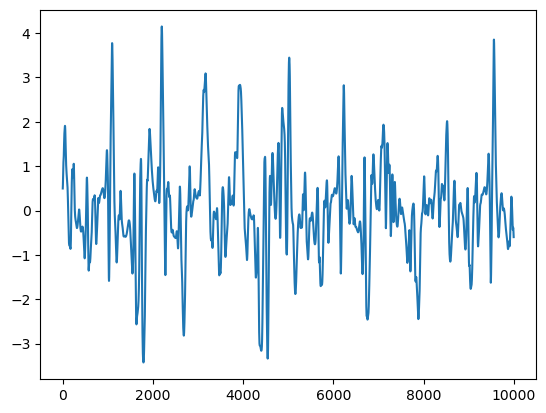

In [4]:
n = 128
g = 2.3
tau = 0.01 # s
np.random.seed(42)
y0 = np.random.randn(n)
W = np.random.randn(n, n)*g/np.sqrt(n)

t_span = [0, 10]
dt = 0.001
t_eval = np.arange(t_span[0], t_span[1], dt)
sol = solve_ivp(lambda t, x: RNNChaotic._rhs(x, t, W=W, tau=tau), y0=y0, t_span=t_span, t_eval=t_eval)
plt.plot(sol.y.T[:, 0])
plt.show()

In [5]:
eq_vals = dict(
    eq_name='RNNChaotic',
    # citation="Alfred James Lotka. Elements of physical biology. Williams & Wilkins, 1925." + " | " + "Karniol-Tambour, O., Zoltowski, D. M., Diamanti, E. M., Pinto, L., Tank, D. W., Brody, C. D., & Pillow, J. W. (2022). Modeling communication and switching nonlinear dynamics in multi-region neural activity. In bioRxiv (p. 2022.09.13.507841). https://doi.org/10.1101/2022.09.13.507841",
    embedding_dimension=n,
    parameters={'W': W.tolist(), 'tau': tau},
    initial_conditions=y0.tolist(),
    positive_only=False,
    vectorize=True,
    dt=0.001,
    sim_time=8,
)

Overriding: metadata will be made!
Making metadata for RNNChaotic!
Computing trajectory solutions...
Trajectory solutions identified!!
0.001
Finding period...


  0%|          | 0/3200 [00:00<?, ?it/s]

Chosen period is 0.8494400663625051 seconds
plotting stuff...


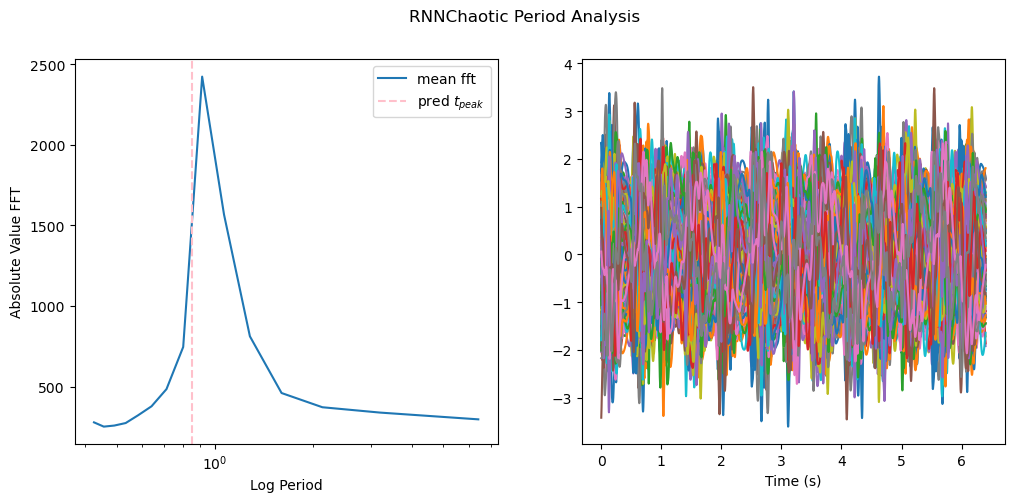

In [6]:
make_metadata(**eq_vals, override=True, testing=False)

### Testing

In [ ]:
eq = RNNChaotic()

In [ ]:
ret = eq.make_trajectory(n_periods=12, pts_per_period=100, num_ics=10, return_times=True, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

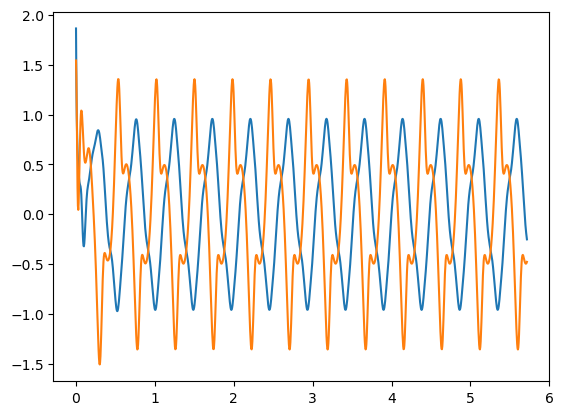

In [ ]:
sol = ret['values']
plt.plot(ret['time'], sol[0, :, 0])
plt.plot(ret['time'], sol[0, :, 98])
plt.show()

# Lorenz96

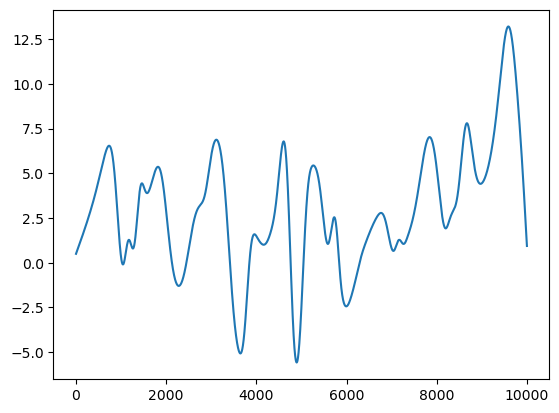

In [14]:
n = 128
F = 8
np.random.seed(42)
y0 = np.random.randn(n)

t_span = [0, 10]
dt = 0.001
t_eval = np.arange(t_span[0], t_span[1], dt)
sol = solve_ivp(lambda t, x: Lorenz96._rhs(x, t, F=F), y0=y0, t_span=t_span, t_eval=t_eval)
plt.plot(sol.y.T[:, 0])
plt.show()

In [19]:
jacs = np.zeros((sol.y.shape[1], n, n))
for t in tqdm(range(sol.y.shape[1])):
    jacs[t] = Lorenz96._jac(sol.y[:, t], t, F=F)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [30]:

k = 48

lyaps= compute_lyaps(torch.from_numpy(np.eye(n) + dt*jacs), dt=dt, k=k)
        # lyap_vals[num_traj] = compute_lyapunov_exponents(np.eye(3) + dt*jacobian_mats[num_traj], dt=dt)

In [32]:
eq_vals = dict(
    eq_name='Lorenz96',
    citation="Lorenz, E. N. (1996). Predictability: A problem partly solved. In Proceedings of the seminar on predictability, Vol. I (pp. 1-18).",
    # citation="Alfred James Lotka. Elements of physical biology. Williams & Wilkins, 1925." + " | " + "Karniol-Tambour, O., Zoltowski, D. M., Diamanti, E. M., Pinto, L., Tank, D. W., Brody, C. D., & Pillow, J. W. (2022). Modeling communication and switching nonlinear dynamics in multi-region neural activity. In bioRxiv (p. 2022.09.13.507841). https://doi.org/10.1101/2022.09.13.507841",
    embedding_dimension=n,
    parameters={'F': F},
    initial_conditions=y0.tolist(),
    positive_only=False,
    vectorize=True,
    dt=0.001,
    sim_time=10,
)

Overriding: metadata will be made!
Making metadata for Lorenz96!
Computing trajectory solutions...
Trajectory solutions identified!!
0.001
Finding period...


  0%|          | 0/3200 [00:00<?, ?it/s]

Chosen period is 1.8125177003681676 seconds
plotting stuff...


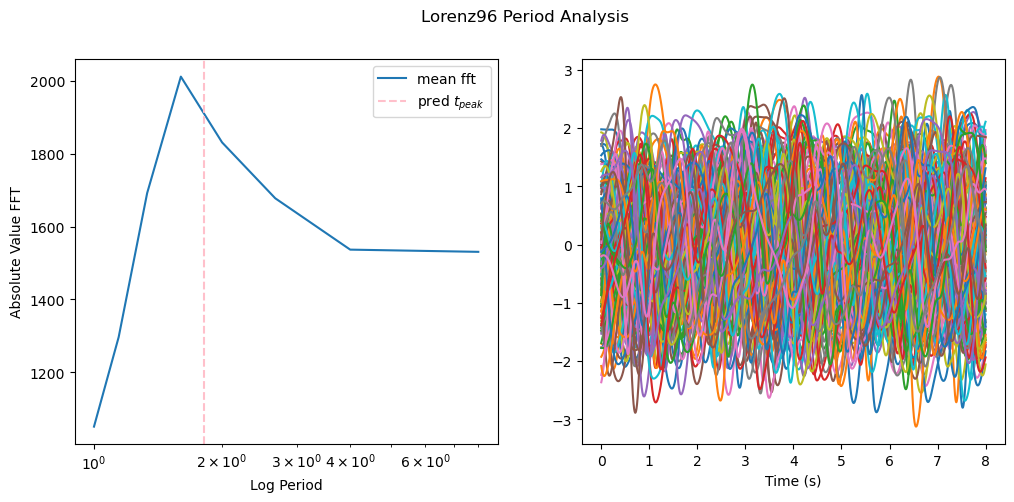

In [33]:
make_metadata(**eq_vals, override=True, testing=False)

### Testing

In [5]:
eq = Lorenz96()

In [6]:
n_periods = 12
pts_per_period = 100
ret = eq.make_trajectory(n_periods=n_periods, pts_per_period=pts_per_period, num_ics=10, return_times=True, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

In [10]:
jacs = eq.jac(ret['values'], ret['time'])

In [14]:
dt = eq.period/pts_per_period

In [20]:
lyaps = compute_lyaps(torch.matrix_exp(torch.from_numpy(jacs)*dt), dt=dt, k=5)

In [23]:
eq._load_data()

{'bifurcation_parameter': None,
 'citation': 'Lorenz, E. N. (1996). Predictability: A problem partly solved. In Proceedings of the seminar on predictability, Vol. I (pp. 1-18).',
 'correlation_dimension': None,
 'delay': False,
 'description': None,
 'dt': 0.000725007080147267,
 'embedding_dimension': 128,
 'hamiltonian': False,
 'initial_conditions': [0.4967141530112327,
  -0.13826430117118466,
  0.6476885381006925,
  1.5230298564080254,
  -0.23415337472333597,
  -0.23413695694918055,
  1.5792128155073915,
  0.7674347291529088,
  -0.4694743859349521,
  0.5425600435859647,
  -0.46341769281246226,
  -0.46572975357025687,
  0.24196227156603412,
  -1.913280244657798,
  -1.7249178325130328,
  -0.5622875292409727,
  -1.0128311203344238,
  0.3142473325952739,
  -0.9080240755212109,
  -1.4123037013352915,
  1.465648768921554,
  -0.22577630048653566,
  0.06752820468792384,
  -1.4247481862134568,
  -0.5443827245251827,
  0.11092258970986608,
  -1.1509935774223028,
  0.37569801834567196,
  -0.60

In [22]:
lyaps

tensor([[1.3284, 1.3686, 1.1474, 1.1315, 1.1132],
        [1.3537, 1.2557, 1.3101, 1.1826, 1.1663],
        [1.3075, 1.3950, 1.4664, 1.2586, 1.2093],
        [1.5053, 1.2918, 1.1200, 1.1454, 1.1014],
        [1.5816, 1.4526, 1.4605, 1.3539, 1.2075],
        [1.2439, 1.3483, 1.1878, 1.1267, 1.0599],
        [1.3808, 1.4032, 1.2933, 1.3335, 1.2088],
        [1.3706, 1.2474, 1.1282, 1.1332, 1.0717],
        [1.5853, 1.6327, 1.3918, 1.3448, 1.2623],
        [1.4438, 1.3445, 1.4262, 1.1498, 1.1461]], dtype=torch.float64)

# RNNStableSmall

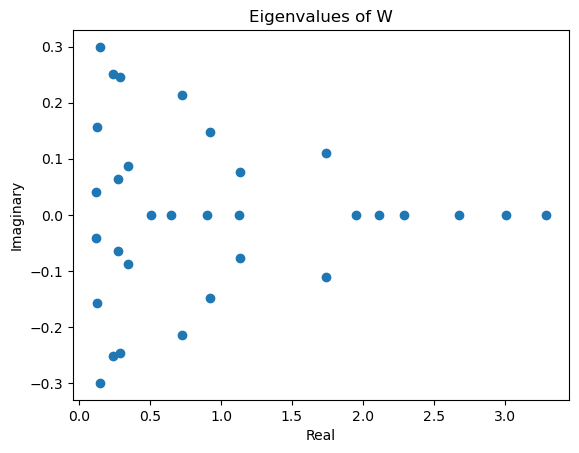

In [107]:
n = 32
g = 1
g_ss = 0.5
tau = 0.5 # s
np.random.seed(42)
num_ics = 40
W = np.random.randn(n, n)*g/np.sqrt(n)

W = W @ W.T
W_ss = np.random.randn(n, n)*g_ss/np.sqrt(n)
W_ss = (W_ss - W_ss.T)/2
W = W + W_ss
# W = W - np.eye(n)*np.real(np.linalg.eigvals(W)).max() + np.eye(n)*1.2
plt.scatter(np.linalg.eigvals(W).real, np.linalg.eigvals(W).imag)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalues of W')
plt.show()

In [108]:
t_span = [0, 40]
dt = 0.001
t_eval = np.arange(t_span[0], t_span[1], dt)
sols = []
for ic in tqdm(range(num_ics)):
    y0 = np.random.randn(n)
    sol = solve_ivp(lambda t, x: RNNStableSmall._rhs(x, t, W=W, tau=tau), y0=y0, t_span=t_span, t_eval=t_eval)
    sols.append(sol.y.T)
sols = np.array(sols)

  0%|          | 0/40 [00:00<?, ?it/s]

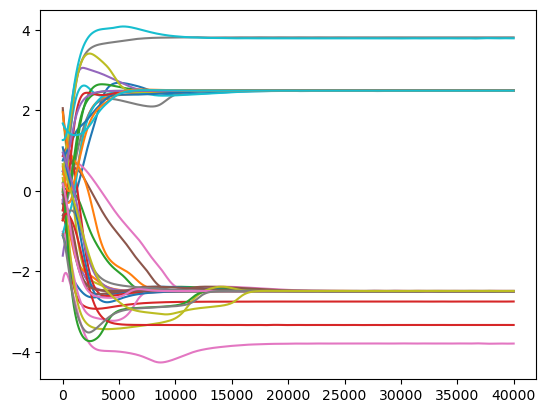

In [109]:
# for i in range(num_ics):
for i in range(40):
    plt.plot(sols[i, :, 0])
plt.show()

In [115]:
eq_vals = dict(
    eq_name='RNNStableSmall',
    # citation="Lorenz, E. N. (1996). Predictability: A problem partly solved. In Proceedings of the seminar on predictability, Vol. I (pp. 1-18).",
    # citation="Alfred James Lotka. Elements of physical biology. Williams & Wilkins, 1925." + " | " + "Karniol-Tambour, O., Zoltowski, D. M., Diamanti, E. M., Pinto, L., Tank, D. W., Brody, C. D., & Pillow, J. W. (2022). Modeling communication and switching nonlinear dynamics in multi-region neural activity. In bioRxiv (p. 2022.09.13.507841). https://doi.org/10.1101/2022.09.13.507841",
    embedding_dimension=n,
    parameters={'W': W, 'tau': tau},
    initial_conditions=y0.tolist(),
    positive_only=False,
    vectorize=True,
    dt=0.001,
    sim_time=10,
    traj_offset_sd=1,
    num_ics=40,
    new_ic_mode='random',
    standardize=False,
    period=10
)

No metadata available for RNNStableSmall
Overriding: metadata will be made!
Making metadata for RNNStableSmall!
Computing trajectory solutions...
Trajectory solutions identified!!


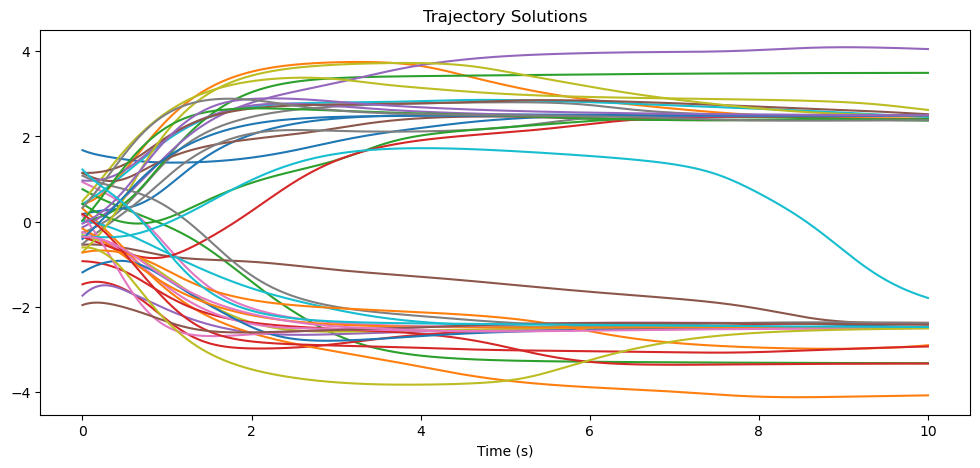

0.001
Period of 10 was provided by the user!


In [117]:
make_metadata(**eq_vals, override=True, testing=False, plot_traj=True, transient_fraction=0)